In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import os

sns.set_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

In [33]:
current_directory = os.getcwd()
file_path = os.path.join(current_directory,"data", "raw", "final_movie_data.csv")

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")

In [34]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| title                  | overview                                                                                                                                                                                                                                                                                                                     | release_date   | genres                                         | runtime   | rating   | cast                                                                                    |
|:-----------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:-----------------------------------------------|:----------|:---------|:----------------------------------------

**Data Info**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         5000 non-null   object        
 1   overview      4975 non-null   object        
 2   release_date  4993 non-null   datetime64[ns]
 3   genres        5000 non-null   object        
 4   runtime       5000 non-null   int64         
 5   rating        5000 non-null   float64       
 6   cast          5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 273.6+ KB


In [44]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

**Check For Missing Values**

In [45]:
print("\nMissing values count:")
df.isnull().sum()


Missing values count:


title            0
overview        25
release_date     7
genres           0
runtime          0
rating           0
cast             0
dtype: int64

In [47]:
df.fillna(0, inplace=True)

In [48]:
df.sample()

,title,overview,release_date,genres,runtime,rating,cast
3228,American Star,An assassin on a final assignment in Fuerteven...,2024-01-26 00:00:00,"['Thriller', 'Mystery', 'Drama']",107,5.6,"['Aya Sugimoto', 'Fujiko', 'Mieko Arai', ""Ken'..."


**Distribution Of Ratings**

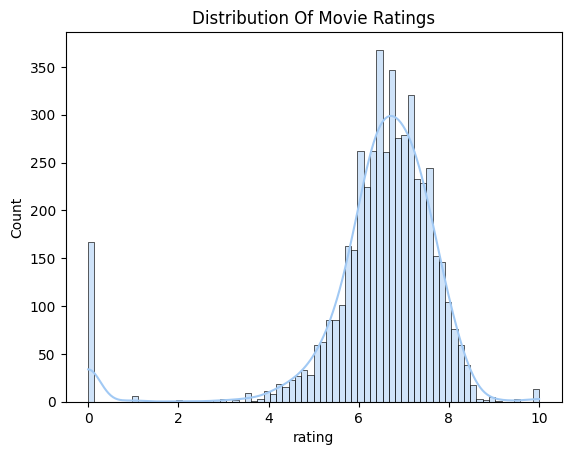

In [56]:
sns.histplot(df['rating'], kde=True)
plt.title('Distribution Of Movie Ratings')
plt.show()

**Runtime vs Rating**

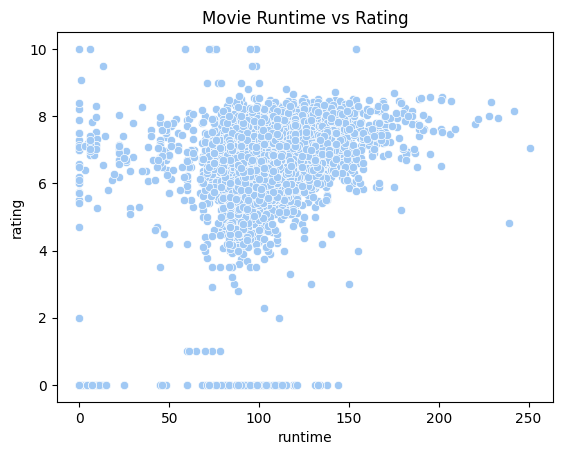

In [57]:
sns.scatterplot(data=df, x='runtime',y='rating')
plt.title('Movie Runtime vs Rating')
plt.show()

**Genre Distribution**

**Release Trends**

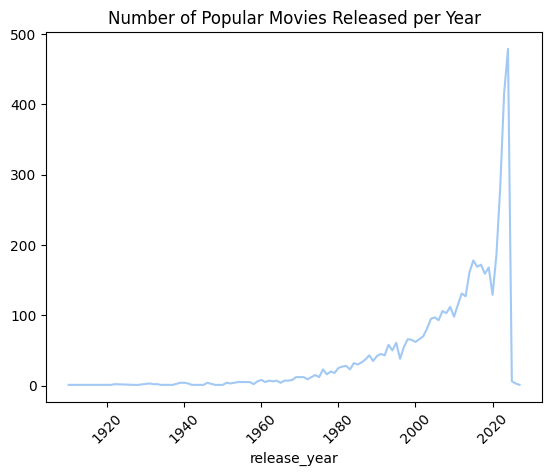

In [60]:
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
yearly_counts = df['release_year'].value_counts()
sns.lineplot(x=yearly_counts.index,y=yearly_counts.values)

plt.title('Number of Popular Movies Released per Year')
plt.xticks(rotation=45)
plt.show()

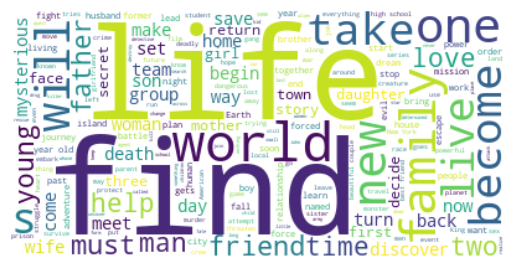

In [63]:
from wordcloud import WordCloud, STOPWORDS

all_overview = " ".join(df['overview'].astype(str))

# Generate wordcloud image
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(all_overview)

# Display Image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Genre Based Clustering**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

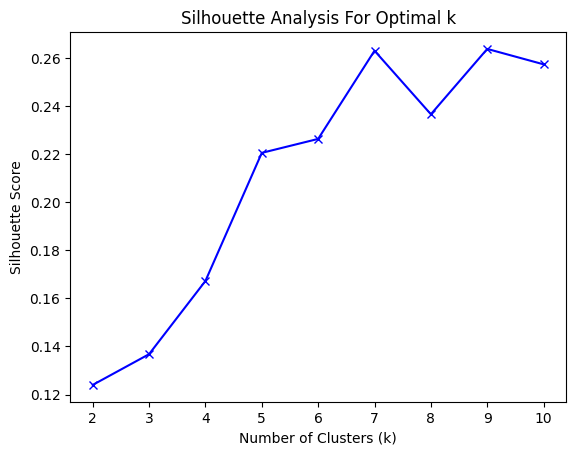

In [68]:
# TF-IDF matrix for genre
tfidf = TfidfVectorizer()
genre_tfidf = tfidf.fit_transform(df['genres'].astype(str))

# Determine optimal number of clusters
silhouette_scores = []

silhouette_scores = []
for n_clusters in range(2, 11):  
    kmeans = KMeans(n_clusters=n_clusters)

    labels = kmeans.fit_predict(genre_tfidf)
    silhouette_avg = silhouette_score(genre_tfidf, labels)
    silhouette_scores.append(silhouette_avg)
    
    
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

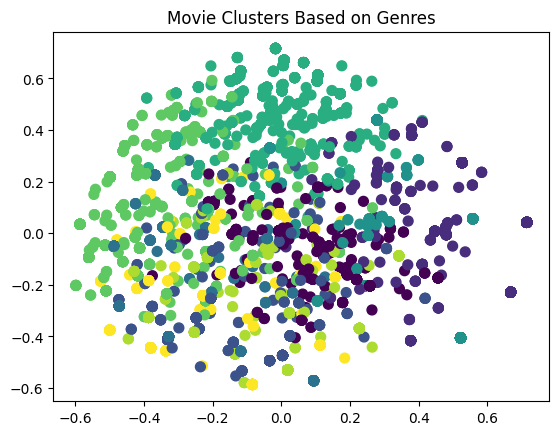

In [69]:
# Choose optimal number of clusters and perform KMeans
optimal_k = 9  
kmeans = KMeans(n_clusters=optimal_k)
df['cluster'] = kmeans.fit_predict(genre_tfidf)

# Visualize clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(genre_tfidf.toarray())

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster'], s=50, cmap='viridis')
plt.title('Movie Clusters Based on Genres')
plt.show()